# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Beatriz Rogers Tripoli Barbosa

**RA**: 792170 

**Nome**: Laura Naomi Seto

**RA**: 813210


---
## Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

### Análise dos atributos

A seguir, estão listados todos os atributos provenientes da base de dados, com seus respectivos problemas em potencial identificados em uma análise prévia:

* **Id**: Identificação única do registro.

* **Peso**: Peso corporal do paciente [kg]
    * valores faltantes

* **Altura**: Altura do paciente [cm]
    * valores fora do intervalo aceitável (0 é válido?)

* **Índice de Massa Corporal** (IMC): $$\frac{Peso}{Altura^2}$$    
    * valores fora do intervalo válido
    * valores faltantes acarretados por: peso ou altura não registrados ou igual a 0

* **Atendimento**: Data de atendimento [DD/MM/AA]
    * valores inválidos

* **Data de Nascimento** (DN): Data de nascimento [DD/MM/AA]
    * valores faltantes
    * valores inválidos

* **Idade**: Idade no momento do atendimento [anos]
    * valores não numéricos ('#VALUE!') acarretados por: atendimento e/ou data de nascimento inválidos 
    * valores fora do intervalo aceitável (idades negativas e pacientes não pediátricos)
    * valores faltantes acarretados por: data de nascimento não registrado
    * valores aparentemente válidos mas atendimento e/ou data de nascimento inválidos

* **Convênio**: Tipo de plano de saúde utilizado para o atendimento

* **Pulsos**: Avaliação da presença e qualidade dos pulsos arteriais [normais, outro, amplos, femorais diminuidos, diminuídos]
    * adotar formas canônicas para os valores possíveis
    * tratamneto por moda baseado na classe
    * conversão simbólico-numérico com **label encoding (ordinal) ou hot-one encoding (nominal)**

* **PA Sistólica**: Valor mais alto registrado durante o batimento cardíaco [mmHg]
    * valores fora fora do intervalo aceitável
    * valores faltantes

* **PA Diastólica**: Valor mais baixo registrado entre os batimentos cardíacos [mmHg]
    * valores fora do intervalo aceitável
    * valores faltantes 

* **Pressão de Pulso Arterial** (PPA): [normal, pre-hipertensão pas, pre-hipertensão pad, has-1 pas, has-1 pad, has-2 pas, has-2 pad]
    * valor inválido ('#VALUE!')
    * conversão simbólico-numérico com label encoding (ordinal)

* **B2**: Segundo som cardíaco [normal, desdob fixo, outro, hiperfonética, única]
    * valores fantantes
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Sopro**: Sopro cardíaco [ausente, sistólico, diastólico, contínuo, 'sistolico e diastólico']
    * adotar formas canônicas para os valores possíveis 
    * conversão simbólico-numérico com label encoding (ordinal): progressão de anormalidade e gravidade

* **Frequência Cardíaca** (FC): Número de batimentos cardíacos por minuto [bpm]
    * valores faltantes
    * valores fora do intervalo aceitável
    * adotar forma canônica para os valores (ex: 123 ou 100-130)
        * valores não numéricos transformados em NaN
        
* **História da Doença Atual 1** (HDA 1): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **História da Doença Atual 2** (HDA2): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * REMOVIDA: 96% dos registros tinham este campo não preenchido

* **Sexo**: Gênero biológico do paciente [masculino, feminino e indeterminado]
    * adotar formas canônicas para os valores possíveis
    * tratamento por moda
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 1**: Principal motivo para o atendimento ['6 - Suspeita de cardiopatia', '2 - Check-up', '5 - Parecer cardiológico', '1 - Cardiopatia já estabelecida', nan, '7 - Outro']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 2**: Motivo secundário para o atendimento ['6 - Palpitação/taquicardia/arritmia', '6 - Dispnéia', nan, '5 - Atividade física', '5 - Cirurgia', '6 - Sopro', '1 - Cardiopatia adquirida', '1 - Cardiopatia congenica', '6 - Dor precordial', '6 - HAS/dislipidemia/obesidade', '6 - Cianose', 'Outro', '6 - Alterações de pulso/perfusão', '6 - Cardiopatia na familia', '6 - Cansaço', '5 - Uso de cisaprida', '6 - Cianose e dispnéia']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Classe**: [normal, anormal]
    * adotar formas canônicas para os valores possíveis

In [65]:
# biblioteca usada para trabalhar com vetores e matrizes
import numpy as np 

# biblioteca usada para trabalhar com dataframes e análise de dados
import pandas as pd

# bibliotecas usadas para geração de graficos
import seaborn as sns
import matplotlib.pyplot as plt

# importando scripts 
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *

print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


In [66]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'data/RHP_data.csv', sep=',', index_col=None) 

# TREINO
df_train_id = pd.read_csv('data/train.csv', sep=',', index_col=None)

# TESTE
df_test_id = pd.read_csv('data/test.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


In [67]:
# TREINO
# recuperar as partições por Id e concatenar o coluna alvo CLASSE
print("Registros de treino fornecidos: ", df_train_id.shape)
df_train = pd.merge(df_train_id, df_dataset, on='Id')
classes = df_train.pop('CLASSE')
df_train['CLASSE'] = classes
# remover os registros de treino que não possuem atributo alvo classificado
df_train = df_train.dropna(subset=['CLASSE'], axis=0).reset_index(drop=True)
print("Registros de treino classificados: ", df_train.shape)

# TESTE
df_test =  pd.merge(df_test_id, df_dataset, on='Id')
print("Registros de teste fornecidos: ", df_test.shape)

Registros de treino fornecidos:  (14727, 2)
Registros de treino classificados:  (13559, 21)
Registros de teste fornecidos:  (3146, 20)


In [68]:
# ANÁLISE DE VALORES FALTANTES
analise_valores_faltantes(df_train)
analise_valores_faltantes(df_test)

Relação de atributos e porcentagem de nulos: 


qtd          %
Id                 0.0   0.000000
Peso             252.0   1.858544
Altura             0.0   0.000000
IMC             3178.0  23.438307
Atendimento      225.0   1.659414
DN               604.0   4.454606
IDADE            604.0   4.454606
Convenio        3711.0  27.369275
PULSOS            46.0   0.339258
PA SISTOLICA    5339.0  39.376060
PA DIASTOLICA   5349.0  39.449812
PPA              197.0   1.452910
B2                30.0   0.221255
SOPRO             21.0   0.154879
FC               746.0   5.501881
HDA 1           3484.0  25.695110
HDA2           13025.0  96.061656
SEXO               3.0   0.022126
MOTIVO1          297.0   2.190427
MOTIVO2         3253.0  23.991445
CLASSE             0.0   0.000000

Relação de atributos e porcentagem de nulos: 


qtd          %
Id                0.0   0.000000
Peso             58.0   1.843611
Altura            0.0   0.000000
IMC             710.0  22.568341
Atendimento       0.0   0.000000
DN                0.0   0.000000
IDADE             0.0   0.000000
Convenio        811.0  25.778767
PULSOS            6.0   0.190718
PA SISTOLICA   1235.0  39.256198
PA DIASTOLICA  1235.0  39.256198
PPA              20.0   0.635728
B2                2.0   0.063573
SOPRO             2.0   0.063573
FC              146.0   4.640814
HDA 1           800.0  25.429116
HDA2           3033.0  96.408137
SEXO              1.0   0.031786
MOTIVO1          24.0   0.762873
MOTIVO2         719.0  22.854418

---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

##### Abordagens
**Valores faltantes e inválidos** - analisar porcentagem de valores faltantes e natureza dos dados (numérico, categórico, temporais)
- exclusão de linha (poucos faltantes)
- exclusão de coluna (muitos faltantes)
- substituição por média, mediana (melhor quando há outliers) ou moda (dados categóricos)
- substituição por interpolação (adequada para séries temporais)

**Duplicatas** (todos os valores de atributos iguais e mesma classificação) 
- exclusão de linha

**Inconsistências** (todos os valores de atributos iguais e classificados diferentemente)
- exclusão das linhas

In [69]:
# EXCLUIR ATRIBUTOS CONSIDERADOS IRRELEVANTES

# TREINO
df_train = df_train.drop(columns=['Atendimento', 'DN', 'Convenio', 'PPA', 'HDA2', 'MOTIVO2'], axis=1)

# TESTE
df_test = df_test.drop(columns=['Atendimento', 'DN', 'Convenio', 'PPA', 'HDA2', 'MOTIVO2'], axis=1)

In [70]:
col_numerica = ['IMC', 'Peso', 'Altura', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']   
col_categorica = ['PULSOS', 'B2', 'SOPRO', 'HDA 1', 'SEXO', 'MOTIVO1']
col_temporais = ['Atendimento', 'DN']

col_nominal = ["PULSOS", "B2", "SOPRO", "SEXO"]
col_ordinal = ["HDA 1", "MOTIVO1"]

# categoria_ppa = [
#     'normal', 
#     'pre-hipertensão pas', 
#     'pre-hipertensão pad', 
#     'has-1 pas', 
#     'has-1 pad', 
#     'has-2 pas', 
#     'has-2 pad'
# ]
categoria_hda1 = [
    'assintomatico', 
    'ganho de peso', 
    'palpitacao', 
    'dor precordial', 
    'dispneia',
    'desmaio/tontura',
    'cianose',
    'outro'
]
categoria_motivo1 = [
    'check-up',
    'outro',
    'suspeita de cardiopatia',
    'parecer cardiologico',
    'cardiopatia ja estabelecida'
]

In [71]:
# IDENTIFICAR VALORES INVÁLIDOS NO TREINO

# ATRIBUTOS NUMÉRICOS
    # transformando não numéricos em NaN
df_train[col_numerica] = invalidar_nao_numerico(df_train, col_numerica)
        # Restrições do domínio
df_train['IDADE'] = df_train['IDADE'].apply(lambda x: x if 0<x else np.nan)
# df_train['Peso'] = df_train['Peso'].apply(lambda x: x if 0<x else np.nan)
# df_train['Altura'] = df_train['Altura'].apply(lambda x: x if 0<x else np.nan)
# df_train = df_train.loc[df_train['IDADE'] > 0]
df_train = df_train.loc[df_train['Peso'] > 0]
df_train = df_train.loc[df_train['Altura'] > 0]


# ATRIBUTOS CATEGÓRICOS
    # transformando para forma canônica (lower case)
df_train[col_categorica] = padronizar_strings(df_train, col_categorica)
        # SEXO
df_train['SEXO'] = df_train['SEXO'].apply(lambda x: 'f' if x in ['f', 'feminino'] else 'm' if x in ['m', 'masculino'] else 'outro' if x in ['indeterminado'] else np.nan)
       
        # CLASSE
df_train['CLASSE'] = df_train['CLASSE'].apply(lambda x: 'normal' if x in ['Normal', 'Normais'] else 'anormal' if x in ['Anormal'] else np.nan)

In [72]:
# REMOVENDO REGISTROS ADULTOS

df_train = remover_registros_adultos(df_train)

In [73]:
# IDENTIFICAR VALORES INVÁLIDOS NO TESTE

df_test[col_numerica] = invalidar_nao_numerico(df_test, col_numerica)
        # Restrições do domínio
df_train['IDADE'] = df_train['IDADE'].apply(lambda x: x if x>=0 else np.nan)
df_train['Peso'] = df_train['Peso'].apply(lambda x: x if x>=0 else np.nan)
df_train['Altura'] = df_train['Altura'].apply(lambda x: x if x>=0 else np.nan)


df_test[col_categorica] = padronizar_strings(df_test, col_categorica)
        # SEXO
df_test['SEXO'] = df_test['SEXO'].apply(lambda x: 'f' if x in ['f', 'feminino'] else 'm' if x in ['m', 'masculino'] else np.nan)

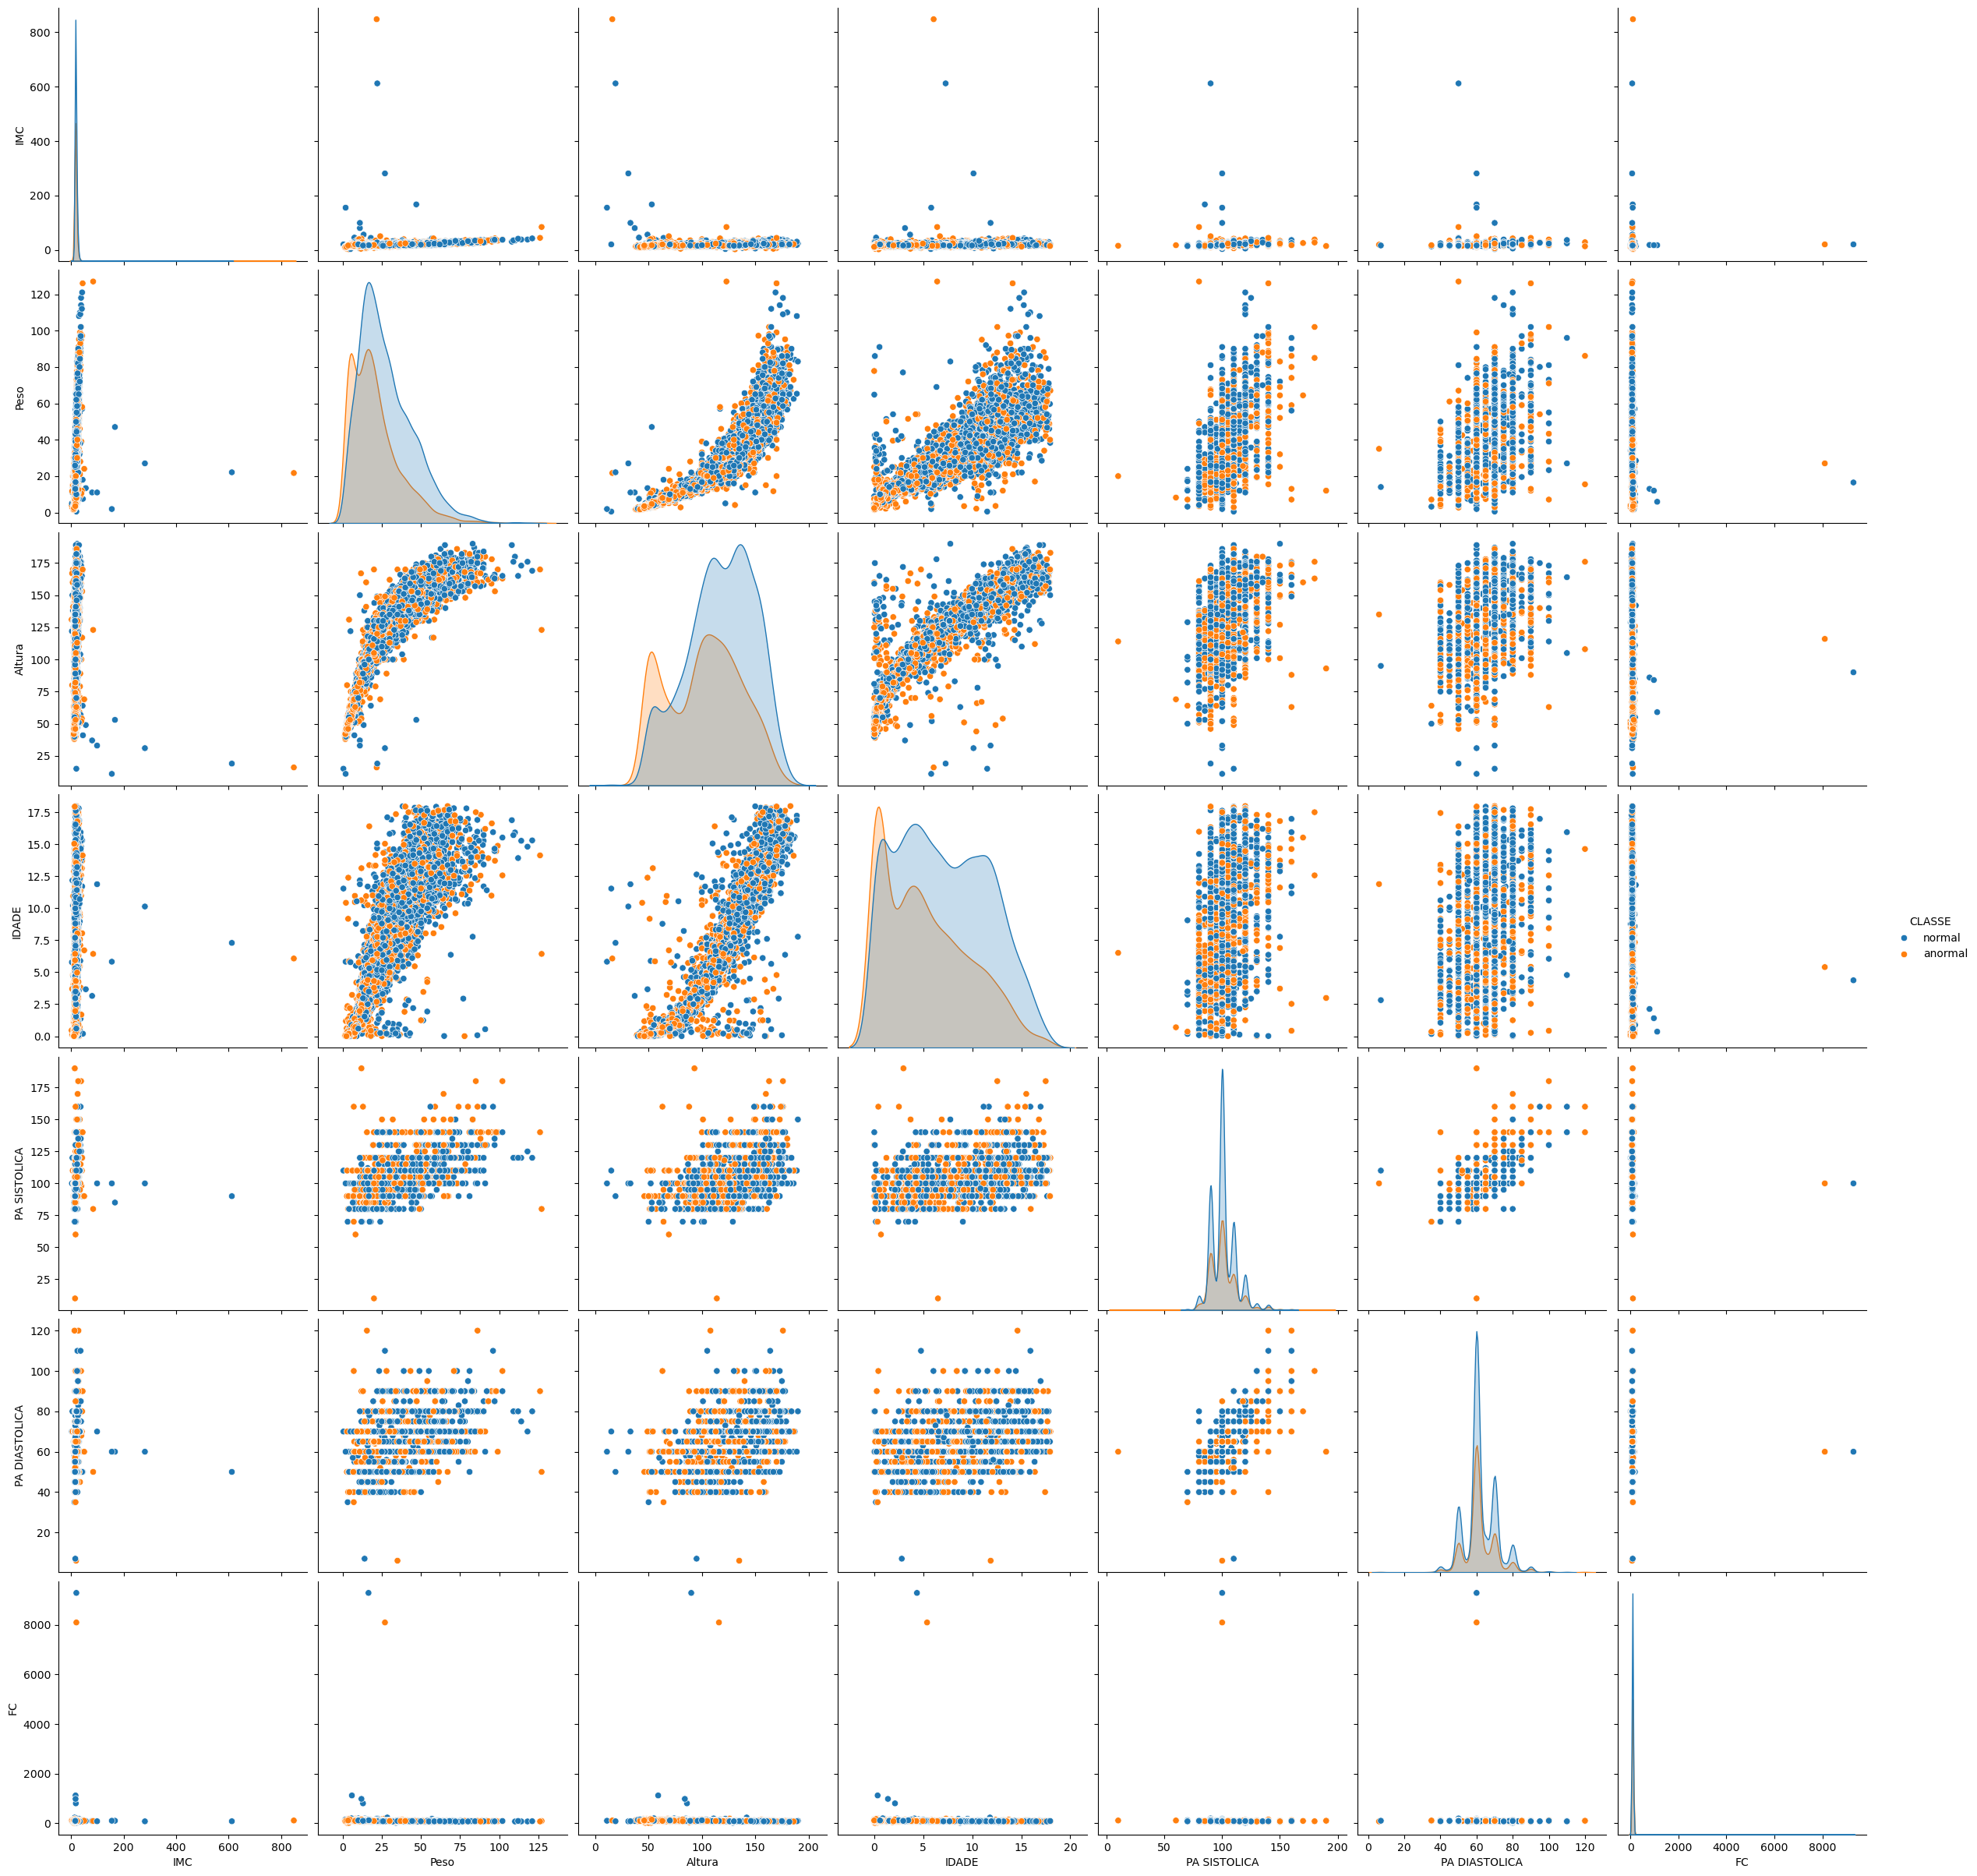

In [74]:
# PRE REMOÇÃO DE OUTLIER

sns.pairplot(df_train[col_numerica+['CLASSE']], hue='CLASSE', height=3.5)
plt.show()

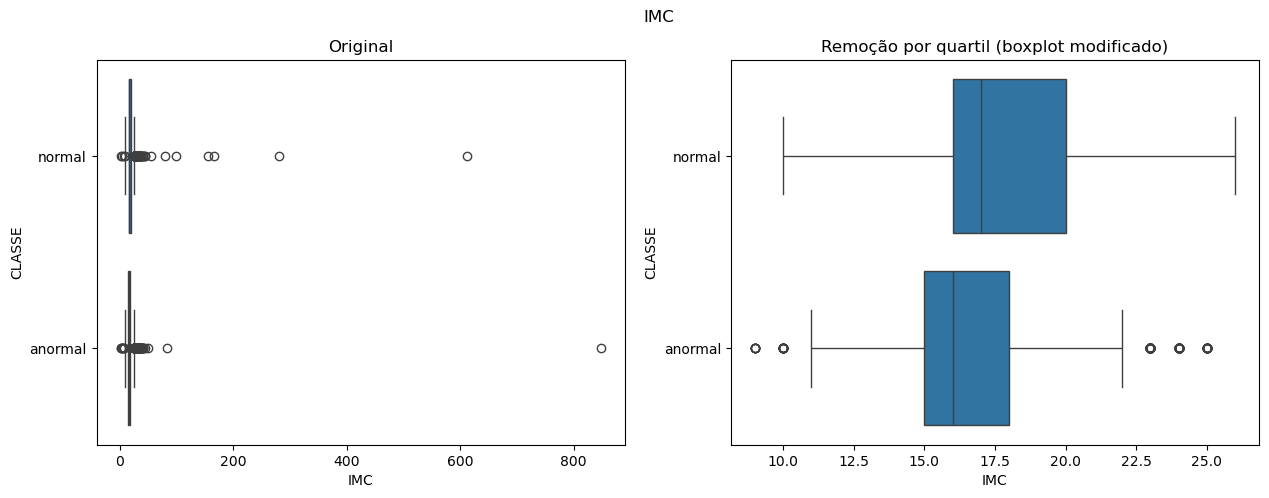

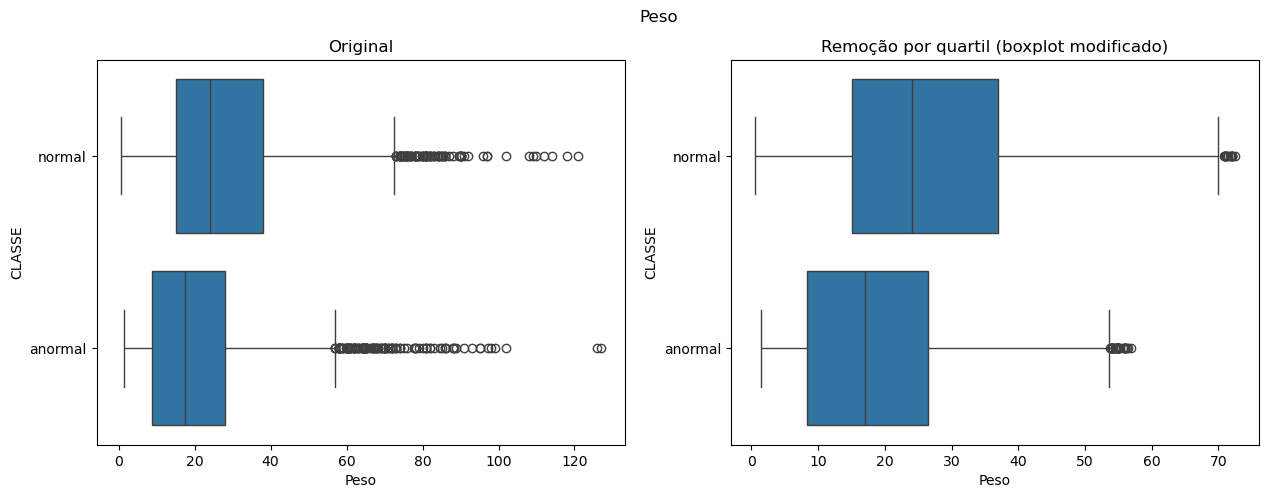

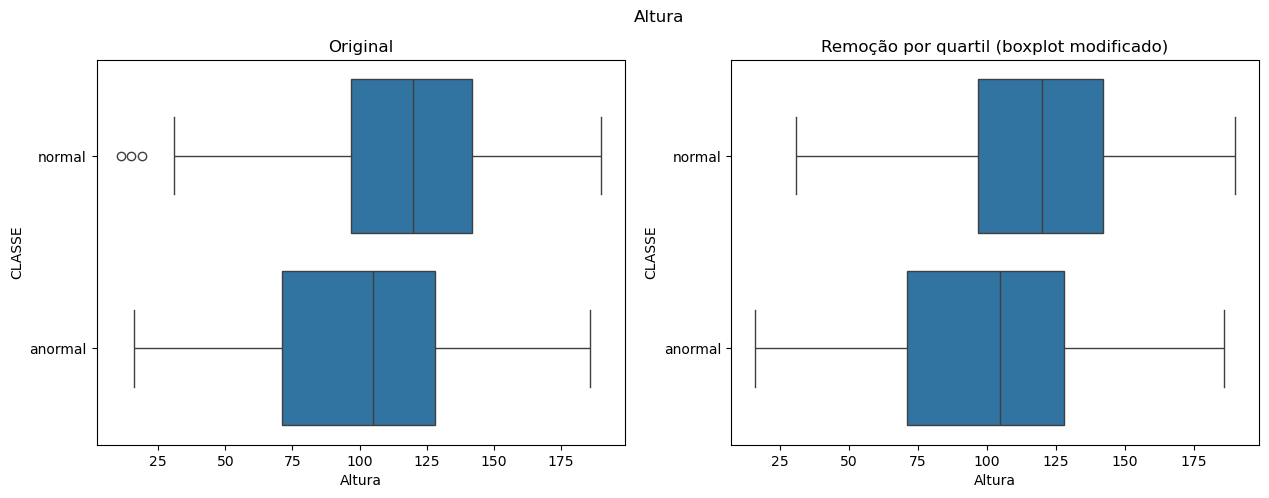

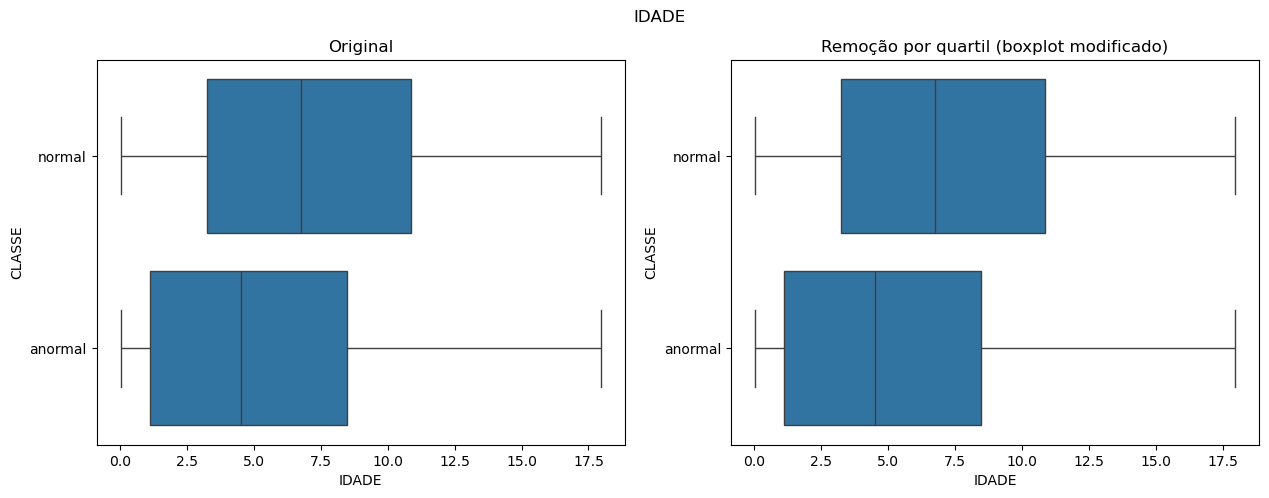

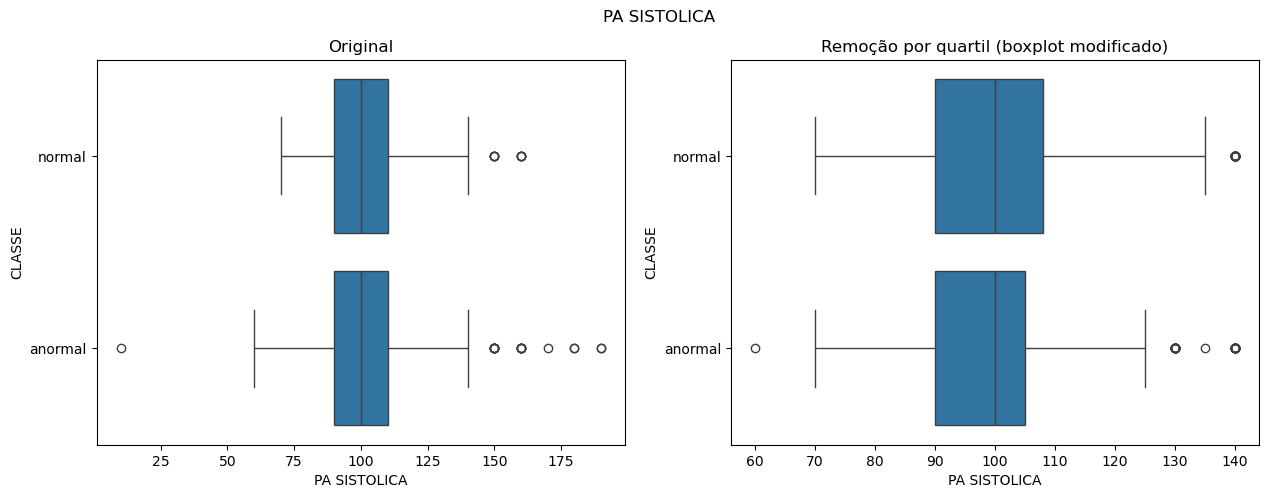

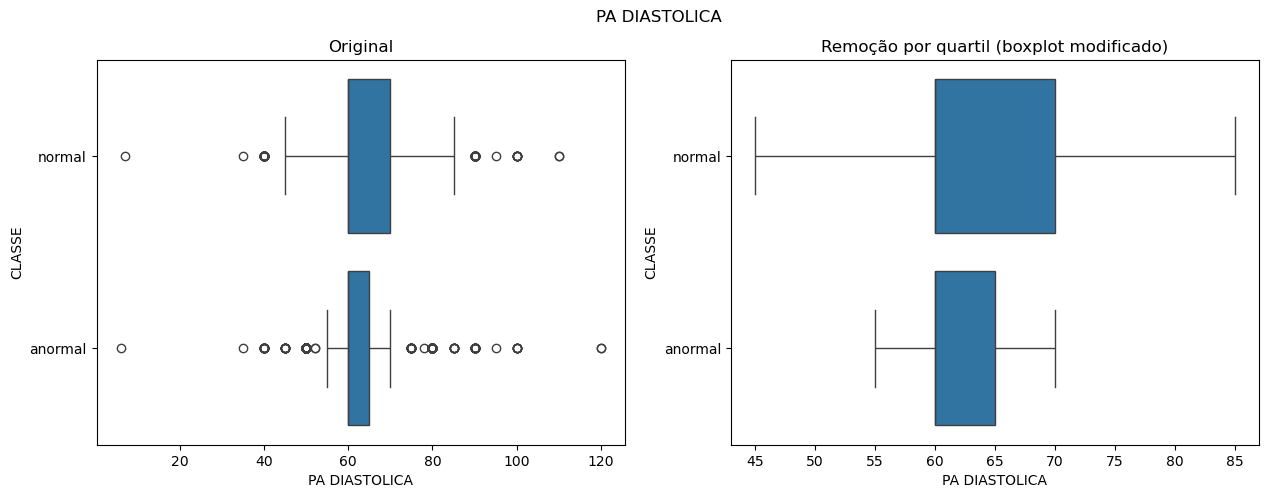

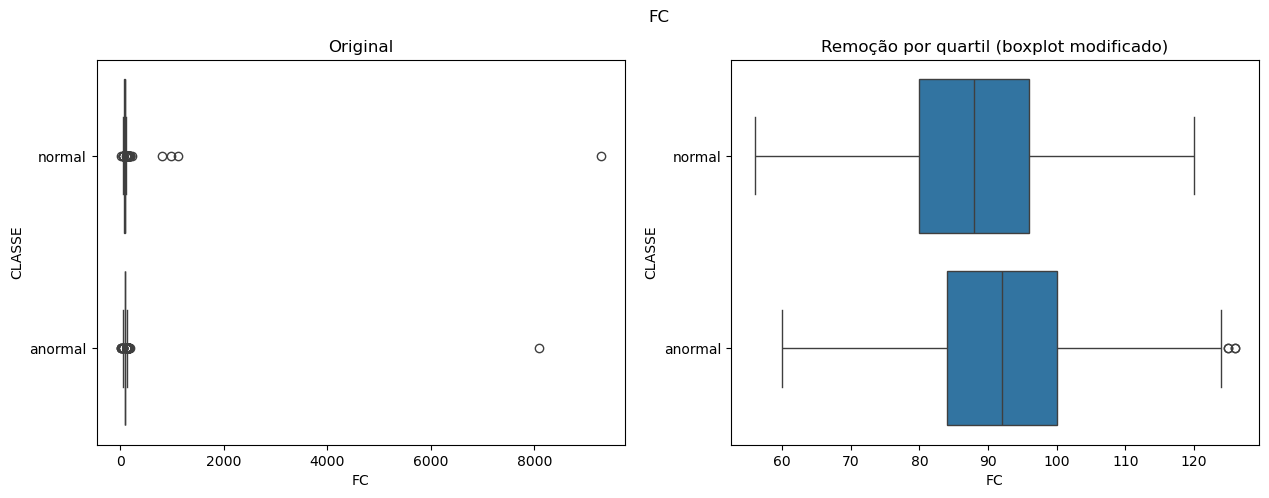

In [75]:
# IDENTIFICAR OUTLIERS SEM CONSIDERAR RELAÇÃO ENTRE ATRIBUTOS

# identificação de outliers por atributo (método boxplot modificado)
df_aux1 = invalidar_outliers_quartil(df_train, col_numerica)

for coluna in col_numerica:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"{coluna}")
    
    sns.boxplot(df_train, x=coluna, y='CLASSE', ax=axes[0])
    axes[0].set_title(f"Original")

    sns.boxplot(df_aux1, x=coluna, y='CLASSE', ax=axes[1])
    axes[1].set_title(f"Remoção por quartil (boxplot modificado)")
    plt.show()

df_train = df_aux1

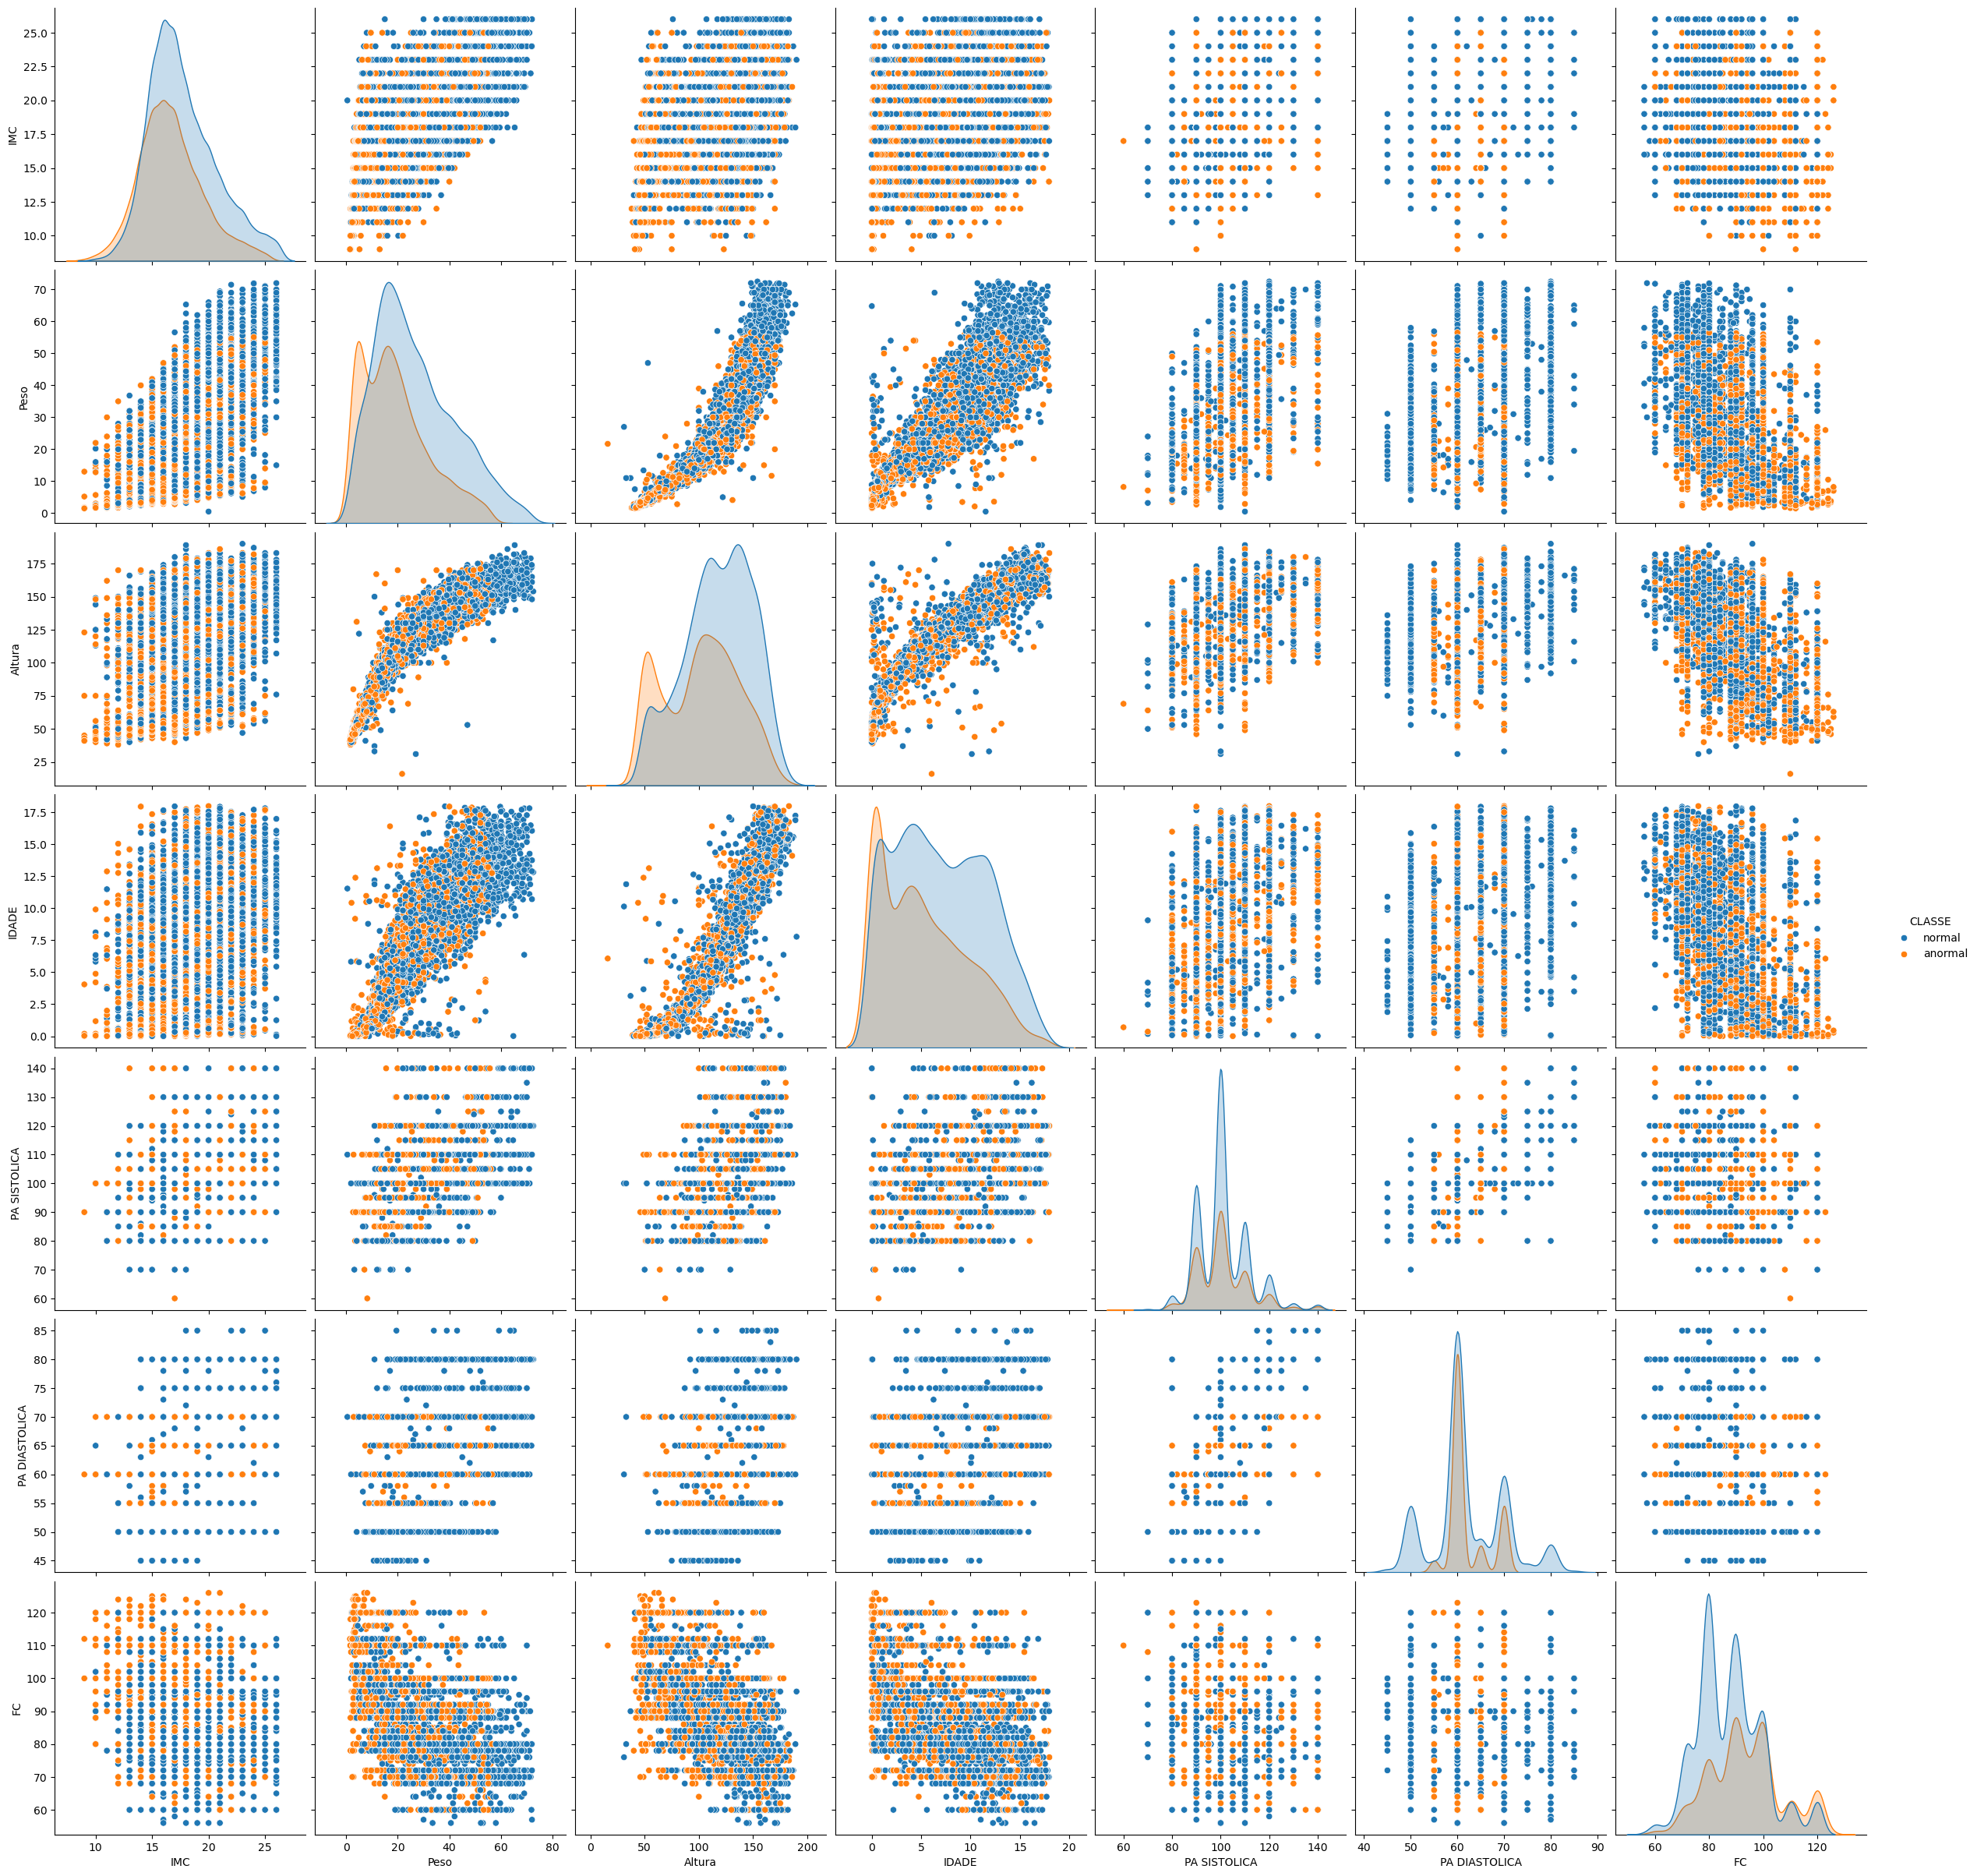

In [76]:
# POS REMOÇÃO DE OUTLIER

sns.pairplot(df_train[col_numerica+['CLASSE']], hue='CLASSE', height=3.5)
plt.show()

In [77]:
# EXCLUIR REGISTROS COM MENOS DE 30% DOS VALORES PREENCHIDOS 

analise_registro_incompleto(df_train, 0.3)
df_train = remover_registros_incompletos(df_train, 0.3).reset_index(drop=True)

print("Conjunto de treino sem registros com baixa taxa de preenchimento: ", df_train.shape)

38 de 10176 (0.37342767295597484%) registros com mais de 30.0% dos atributos faltantes
Conjunto de treino sem registros com baixa taxa de preenchimento:  (10138, 15)


In [78]:
# GERANDO DIFERENTES IMPUTADORES (já ajustado com o conjunto de treino!)

imputador_5nn = imputador_faltantes_knn(df_train, col_numerica, 5)
imputador_media = imputador_faltantes_media(df_train, col_numerica)
imputador_mediana = imputador_faltantes_mediana(df_train, col_numerica)

imputador_moda = imputador_faltantes_moda(df_train, col_categorica)
imputador_constante = imputador_faltantes_outro(df_train, col_categorica)

In [79]:
# IMPUTANDO DADOS NUMÉRICOS

df_train_imputed_5nn = pd.DataFrame(imputador_5nn.transform(df_train[col_numerica]), columns=col_numerica)
df_train_imputed_media = pd.DataFrame(imputador_media.transform(df_train[col_numerica]), columns=col_numerica)
df_train_imputed_mediana = pd.DataFrame(imputador_mediana.transform(df_train[col_numerica]), columns=col_numerica)

Relação de atributos e porcentagem de nulos: 


qtd          %
IMC             326.0   3.215624
Peso            224.0   2.209509
Altura            3.0   0.029592
IDADE           542.0   5.346222
PA SISTOLICA   3834.0  37.818110
PA DIASTOLICA  4389.0  43.292563
FC              937.0   9.242454

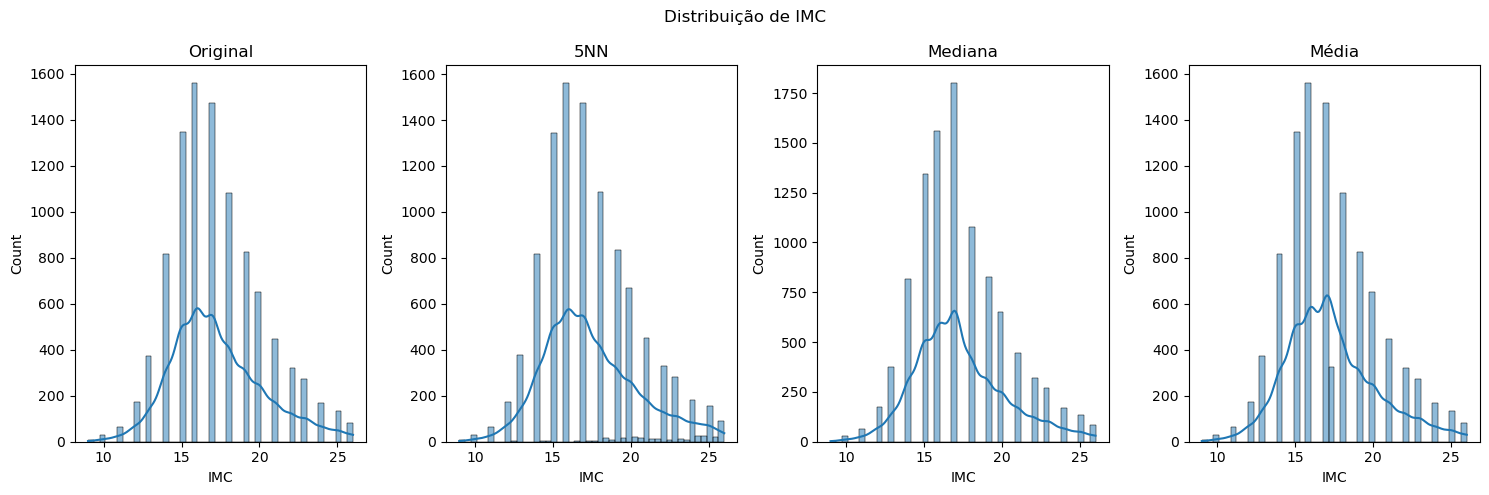

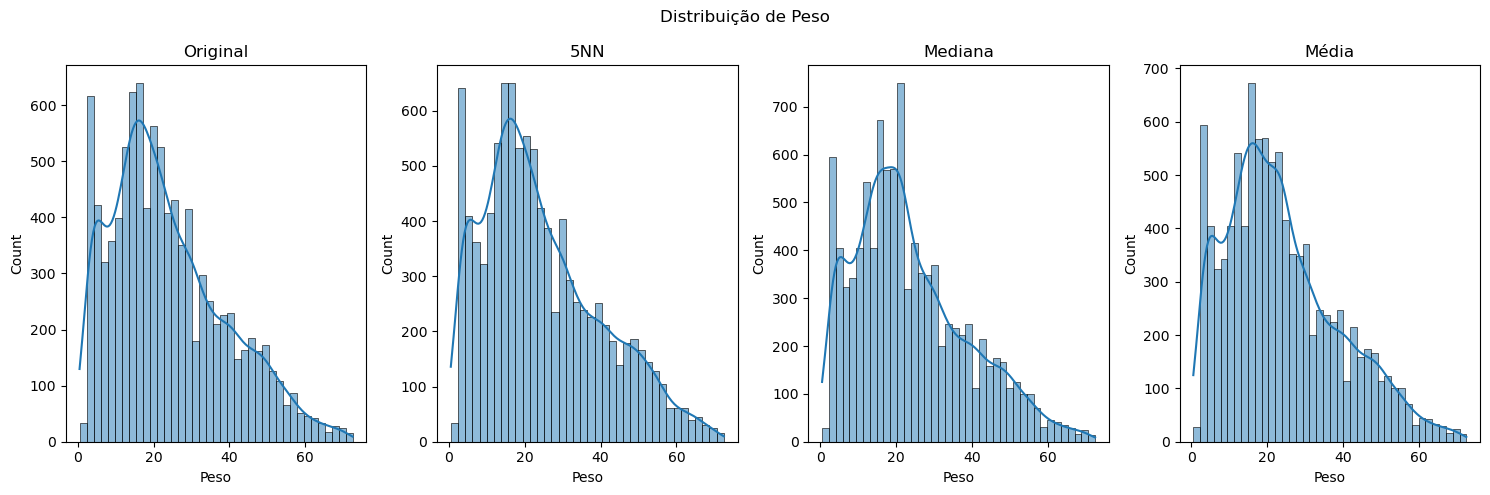

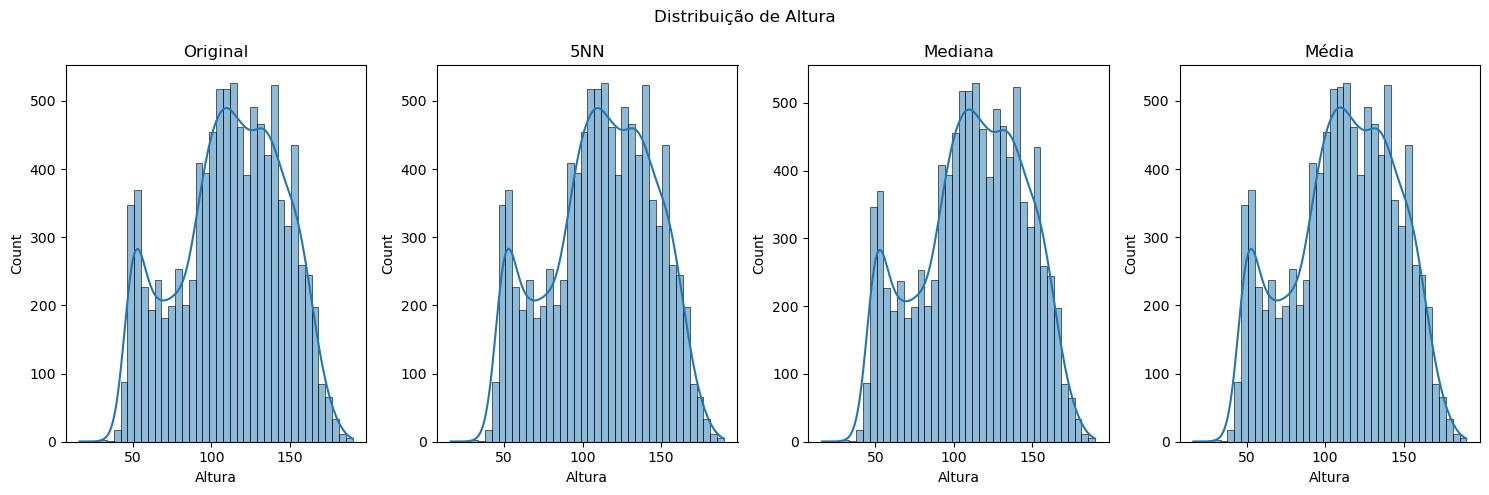

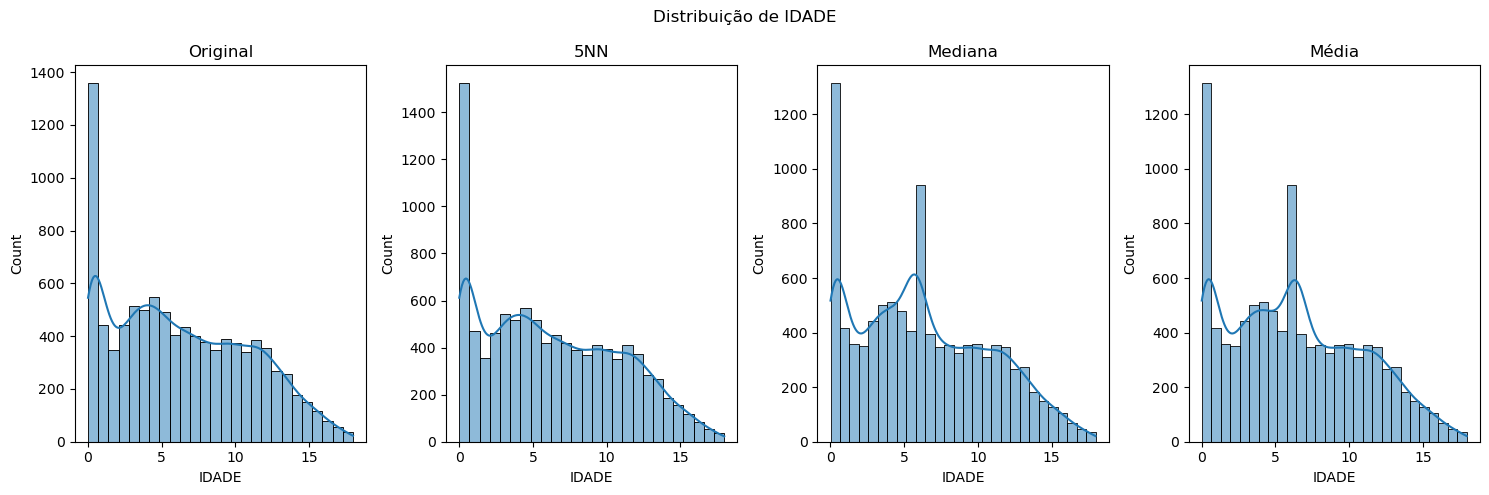

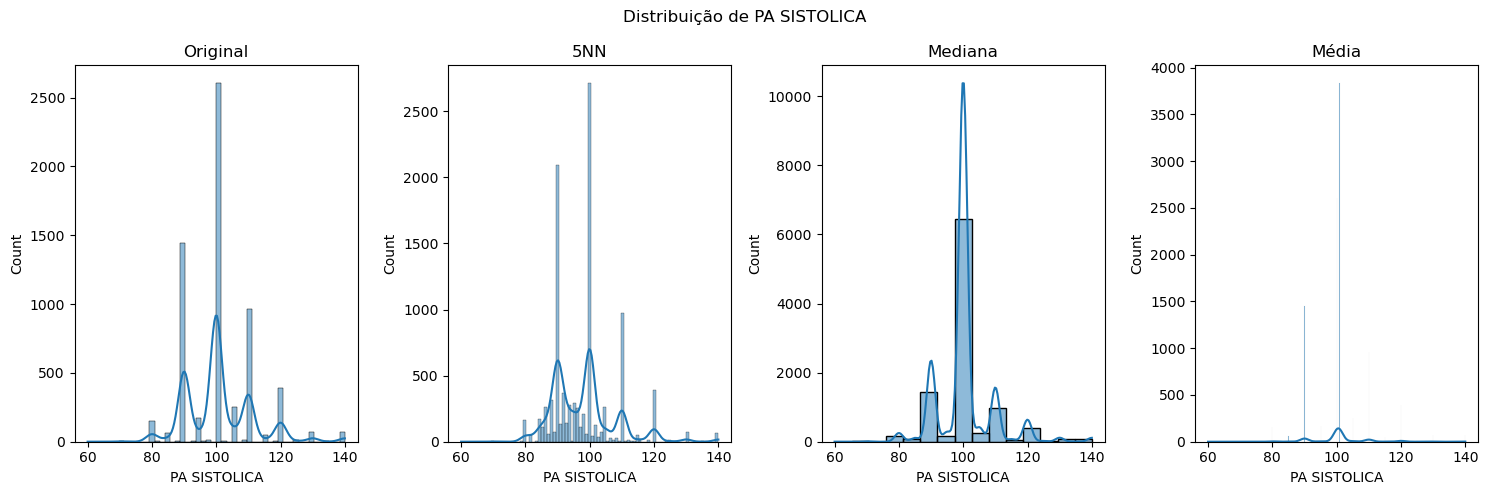

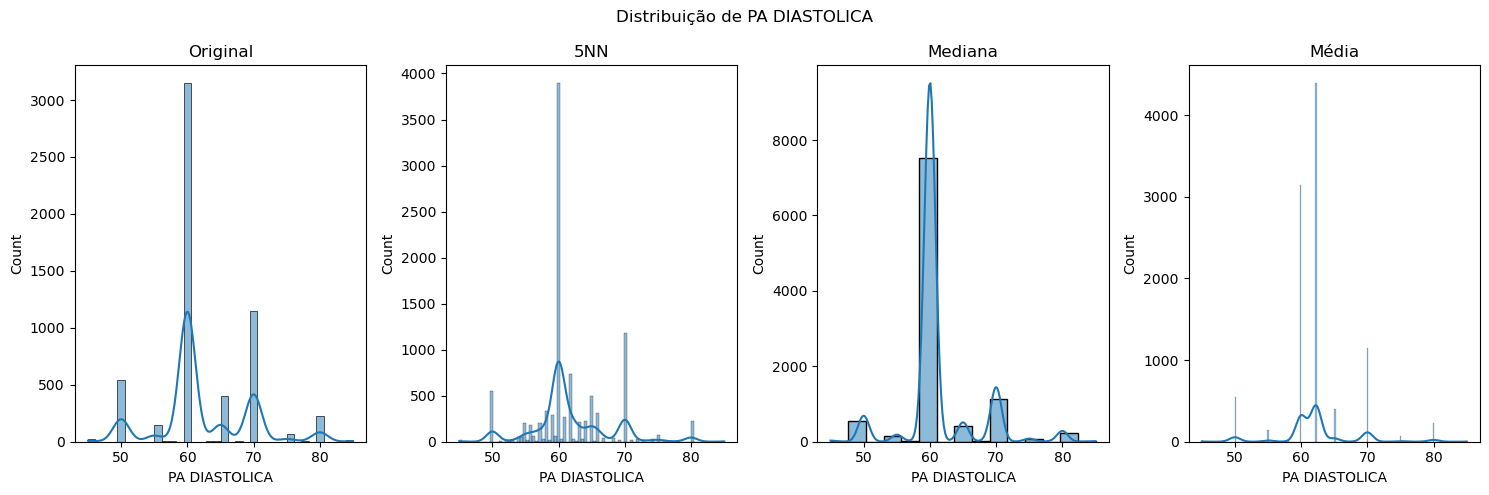

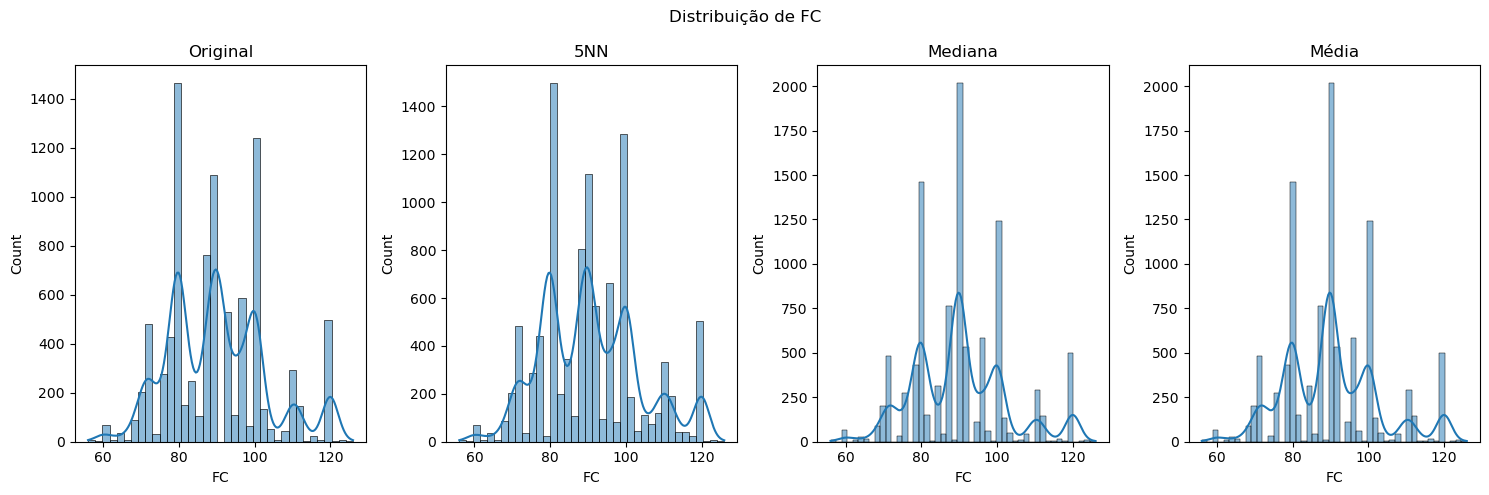

In [80]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS


analise_valores_faltantes(df_train[col_numerica])

for coluna in col_numerica:
    fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"Distribuição de {coluna}")
    # axes.set_xlabel("Valor")

    sns.histplot(df_train[coluna], ax=axes[0], kde=True)
    axes[0].set_title(f"Original")

    sns.histplot(df_train_imputed_5nn[coluna], ax=axes[1], kde=True)
    axes[1].set_title(f"5NN")
    
    sns.histplot(df_train_imputed_mediana[coluna], ax=axes[2], kde=True)
    axes[2].set_title(f"Mediana")
    
    sns.histplot(df_train_imputed_media[coluna], ax=axes[3], kde=True)
    axes[3].set_title(f"Média")

    plt.tight_layout()    
    plt.show()

In [81]:
# IMPUTANDO DADOS CATEGÓRICOS

df_imputed_constante = pd.DataFrame(imputador_constante.transform(df_train[col_categorica]), columns=col_categorica)
df_imputed_moda = pd.DataFrame(imputador_moda.transform(df_train[col_categorica]), columns=col_categorica)

Relação de atributos e porcentagem de nulos: 


qtd          %
PULSOS     13.0   0.128230
B2          5.0   0.049319
SOPRO       0.0   0.000000
HDA 1    2324.0  22.923654
SEXO        2.0   0.019728
MOTIVO1    86.0   0.848294

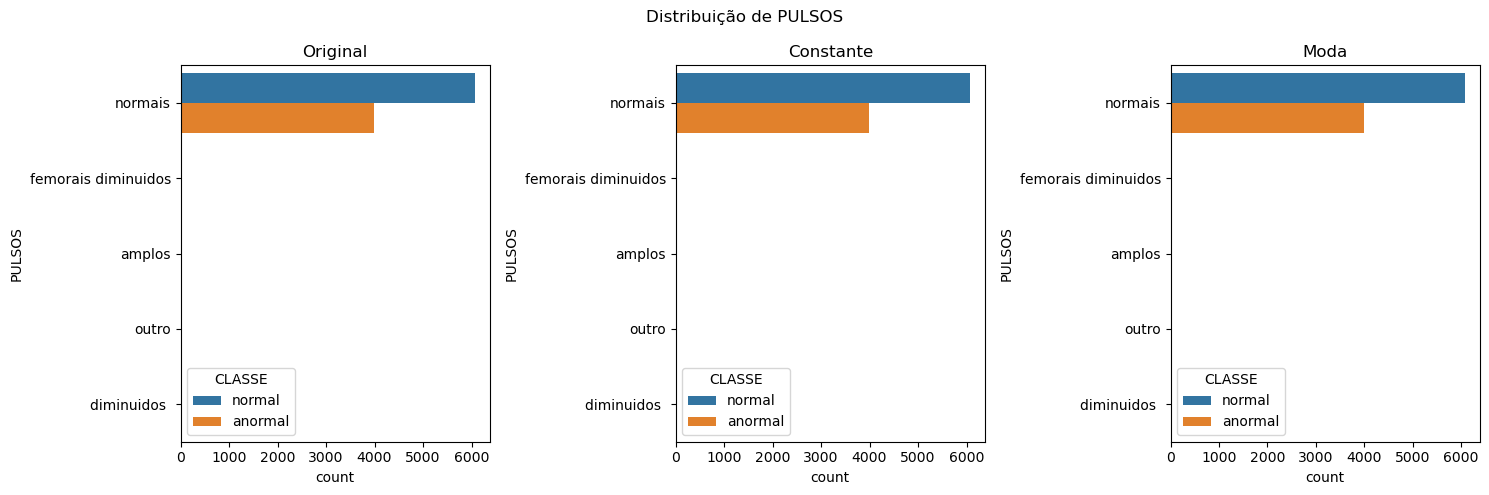

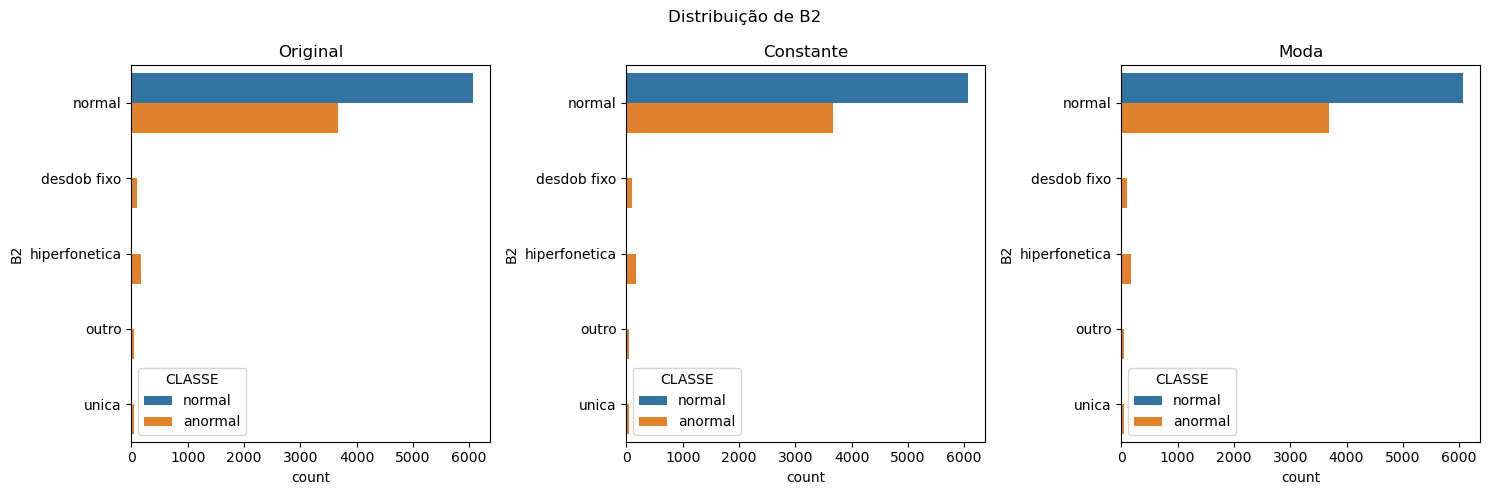

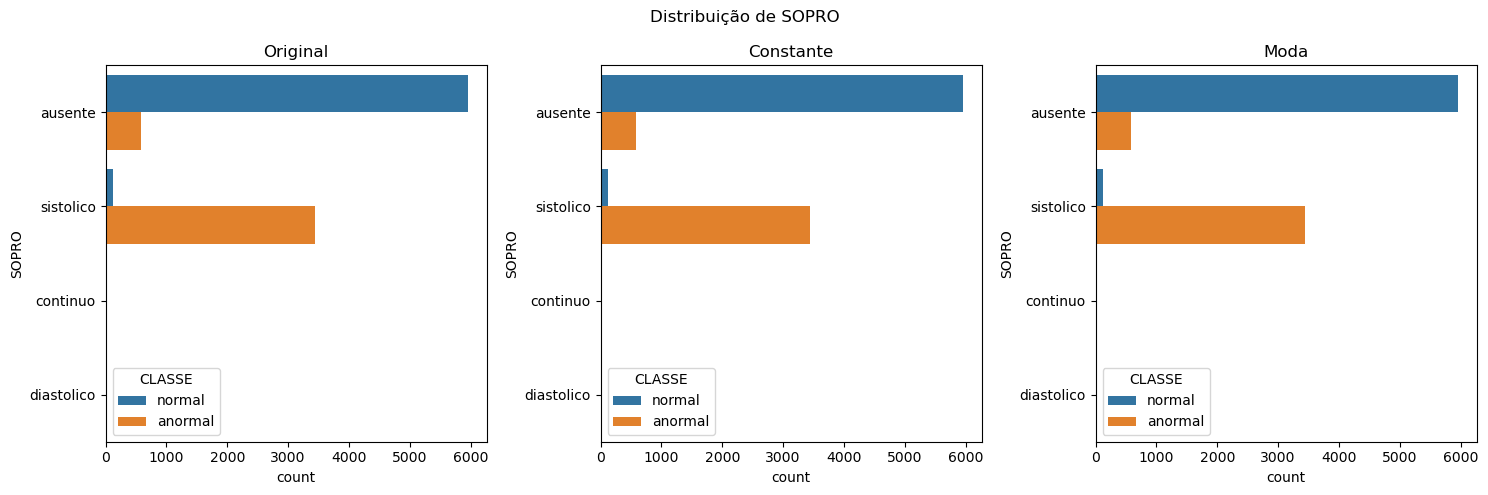

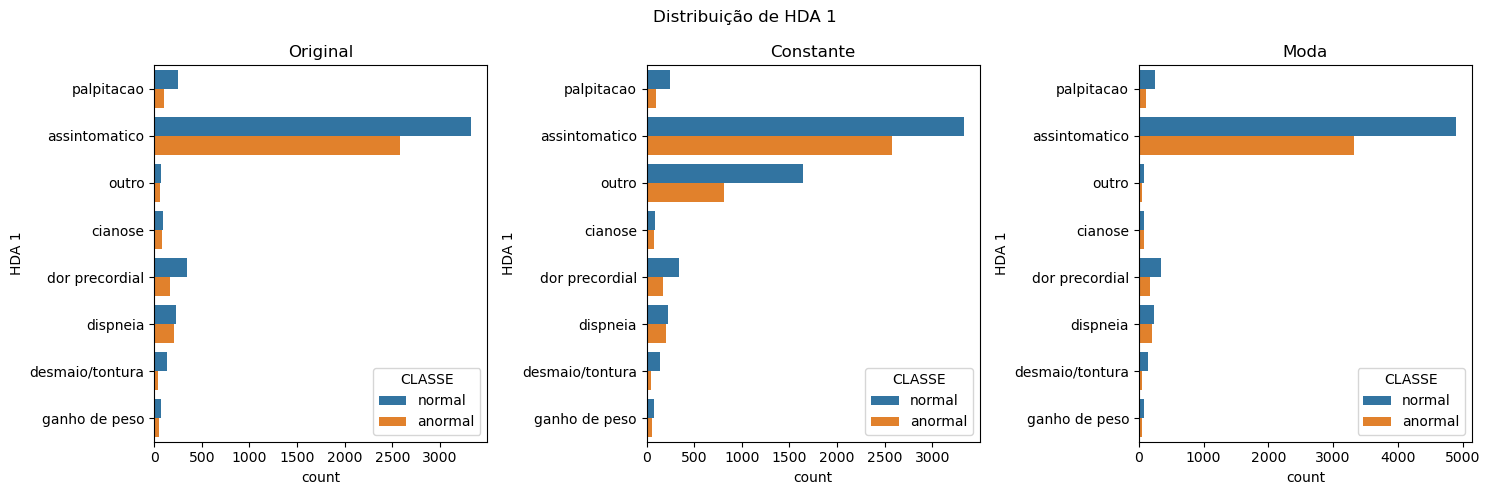

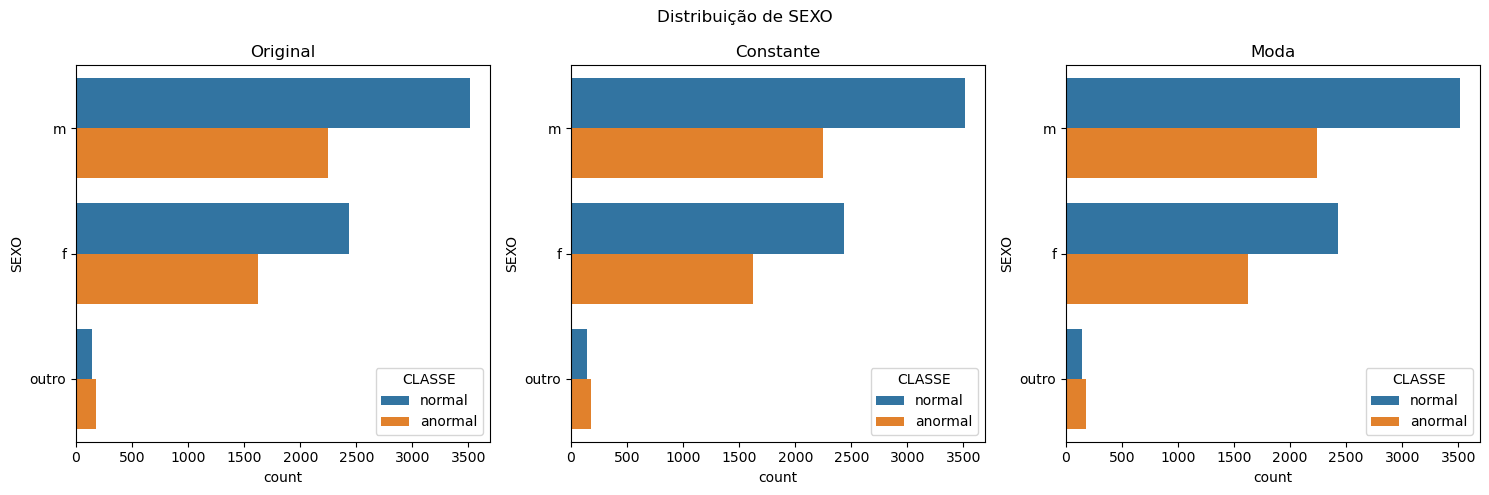

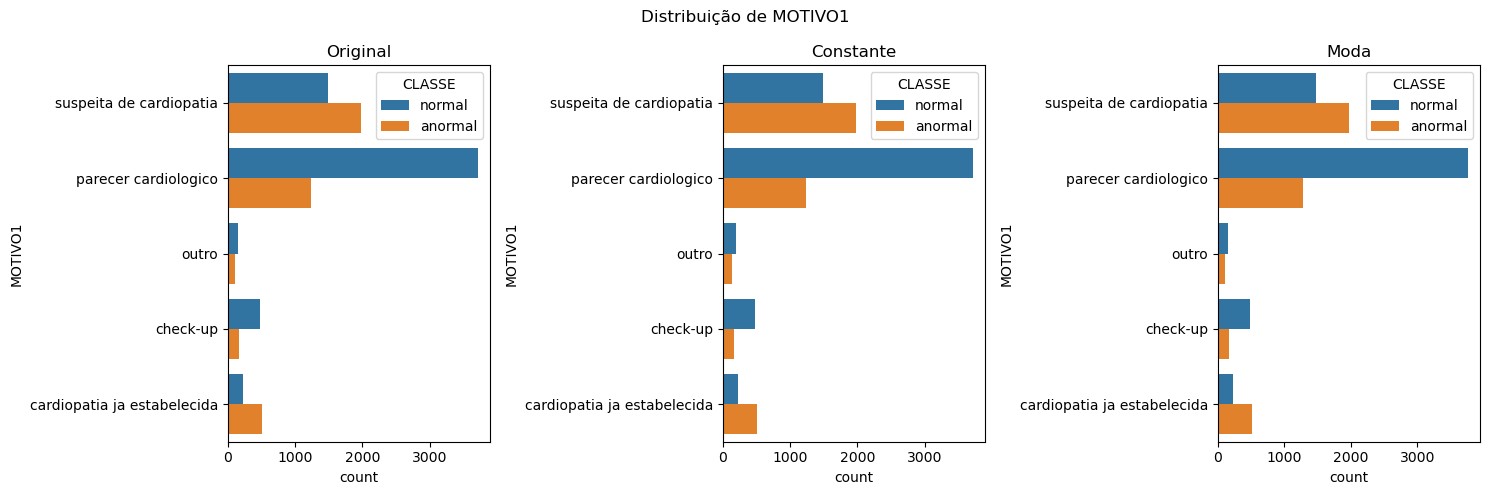

In [82]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS

df_imputed_constante = pd.concat([df_imputed_constante, df_train['CLASSE']], axis=1)
df_imputed_moda = pd.concat([df_imputed_moda, df_train['CLASSE']], axis=1)


analise_valores_faltantes(df_train[col_categorica])

for coluna in col_categorica:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"Distribuição de {coluna}")
    # axes.set_xlabel("Valor")

    sns.countplot(df_train, y=coluna, ax=axes[0], hue='CLASSE')
    axes[0].set_title(f"Original")

    sns.countplot(df_imputed_constante, y=coluna, ax=axes[1], hue='CLASSE')
    axes[1].set_title(f"Constante")

    sns.countplot(df_imputed_moda, y=coluna, ax=axes[2], hue='CLASSE')
    axes[2].set_title(f"Moda")

    plt.tight_layout()    
    plt.show()


df_imputed_constante = df_imputed_constante.drop(columns=['CLASSE'])
df_imputed_moda = df_imputed_moda.drop(columns=['CLASSE'])

In [83]:
# ADOÇÃO DOS MELHORES IMPUTERS

# TREINO
df_train[col_numerica] = df_train_imputed_5nn
df_train[col_categorica] = df_imputed_constante

# TESTE
df_test[col_numerica] = pd.DataFrame(imputador_5nn.transform(df_test[col_numerica]), columns=col_numerica)
df_test[col_categorica] = pd.DataFrame(imputador_moda.transform(df_test[col_categorica]), columns=col_categorica)

In [84]:
# EXLUIR DUPLICATAS (mesmos valores de atributos e mesma classifiação)

df_train = remover_duplicatas(df_train).reset_index(drop=True)
print("Conjunto de treino sem duplicatas: ", df_train.shape)

Conjunto de treino sem duplicatas:  (10076, 15)


In [85]:
# EXCLUIR INCONSISTÊNCIAS (mesmos valores de atributos e classificação diferente)

df_train = remover_inconsistencia(df_train).reset_index(drop=True)
print("Registros de treino sem inconsistências: ", df_train.shape)

Registros de treino sem inconsistências:  (10076, 15)


In [86]:
# GERANDO CODIFICADORES (já ajustado com o conjunto de treino!)
col_ordinal_categorias = [categoria_hda1, categoria_motivo1]
codificador_ordinal = codificador_ordinais(df_train, col_ordinal, col_ordinal_categorias) 

codificador_oneHot = codificador_nominais(df_train, col_nominal)

In [87]:
display(df_train)

Id  Peso  Altura   IMC  IDADE   PULSOS  PA SISTOLICA  PA DIASTOLICA  \
0      10524  28.0   123.0  19.0   5.79  normais         110.0           80.0   
1       4483  13.0    87.0  17.0   2.21  normais          96.0           54.0   
2      11652  42.4   136.0  23.0   0.06  normais         100.0           60.0   
3      15430  45.0   161.0  17.0   7.60  normais         120.0           70.0   
4       1023  18.5   105.0  17.0   3.93  normais          90.0           60.0   
...      ...   ...     ...   ...    ...      ...           ...            ...   
10071   9673  16.7   100.0  17.0   3.49  normais          90.0           60.0   
10072   3023  25.0   126.0  16.0   8.80  normais         100.0           60.0   
10073   3249  30.0   113.0  23.0   4.97  normais         105.0           70.0   
10074   3207  25.8   130.0  15.0   7.69  normais          90.0           55.0   
10075   9470  13.0    89.0  16.0   2.97  normais          95.0           57.0   

           B2      SOPRO     FC          HDA 1 SEXO                  MOTIVO1  \
0      normal    ausente  100.0     palpitacao    m  suspeita de cardiopatia   
1      normal  sistolico  100.0  assintomatico    m  suspeita de cardiopatia   
2      normal    ausente   78.0  assintomatico    f     parecer cardiologico   
3      normal    ausente   80.0  assintomatico    m     parecer cardiologico   
4      normal    ausente   92.0          outro    f                    outro   
...       ...        ...    ...            ...  ...                      ...   
10071  normal    ausente  120.0          outro    f  suspeita de cardiopatia   
10072  normal    ausente   76.0  assintomatico    f     parecer cardiologico   
10073  normal  sistolico   92.0       dispneia    f  suspeita de cardiopatia   
10074  normal    ausente   78.0  assintomatico    m  suspeita de cardiopatia   
10075  normal    ausente   96.0  assintomatico    f     parecer cardiologico   

        CLASSE  
0       normal  
1      anormal  
2       normal  
3       normal  
4       normal  
...        ...  
10071   normal  
10072   normal  
10073  anormal  
10074   normal  
10075   normal  

[10076 rows x 15 columns]

In [88]:
# TRANSFORMÇÃO SIMBÓLICO NUMÉRICO

# TREINO
df_train[col_ordinal] = pd.DataFrame(codificador_ordinal.transform(df_train[col_ordinal]), columns=col_ordinal)

df_train_encoded_nominal = pd.DataFrame(codificador_oneHot.transform(df_train[col_nominal]), columns=codificador_oneHot.get_feature_names_out(col_nominal))
# A ordem será alterada, para mantermos a classe no final ela vai ser separada temporariamente
classes = df_train.iloc[:, -1]
df_train = df_train.drop(columns=["PULSOS", "B2", "SOPRO", "SEXO", "CLASSE"])
# É adicionada novamente a coluna da classe
df_train = pd.concat([df_train, df_train_encoded_nominal], axis=1)
df_train = pd.concat([df_train, classes], axis=1)


# TESTE
df_test[col_ordinal] = pd.DataFrame(codificador_ordinal.transform(df_test[col_ordinal]), columns=col_ordinal)

df_test_encoded_nominal = pd.DataFrame(codificador_oneHot.transform(df_test[col_nominal]), columns=codificador_oneHot.get_feature_names_out(col_nominal))
df_test = df_test.drop(columns=["PULSOS", "B2", "SOPRO", "SEXO"])
df_test = pd.concat([df_test, df_test_encoded_nominal], axis=1)

In [89]:
# CODIFICANDO ATRIBUTO ALVO

df_train['CLASSE'] = df_train['CLASSE'].apply(lambda x: 0 if x in ['normal'] else 1 if x in ['anormal'] else np.nan)

In [90]:
# ANALISANDO CORRELAÇÃO

matriz_correlacao(df_train, col_numerica+col_ordinal)

In [91]:
# GERAR NORMALIZADOR

normalizador_padrao = normalizador(df_train, df_train.columns[1:-1])

In [92]:
# NORMLAIZAR ATRIBUTOS

# TREINO
df_train.iloc[:, 1:-1] = pd.DataFrame(normalizador_padrao.transform(df_train.iloc[:, 1:-1]), columns=df_train.columns[1:-1])

# TREINO
df_test.iloc[:, 1:] = pd.DataFrame(normalizador_padrao.transform(df_test.iloc[:, 1:]), columns=df_test.columns[1:])

In [93]:
# # IDENTIFICAR OUTLIER CONSIDERANDO RELAÇÃO ENTRE ATRIBUTOS

# from sklearn.cluster import DBSCAN

# # df = df_train[['IMC', 'Peso', 'Altura', 'IDADE']]
# df = df_train[col_numerica]


# dbscan = DBSCAN(eps=0.8)
# dbscan.fit(df)

# # Identificação dos outliers
# outliers = dbscan.labels_ == -1

# display(df[outliers])  
# df_train = df_train[~outliers]

In [94]:
# df_test = df_train[col_numerica+['CLASSE']]
# sns.pairplot(df_test[~outliers], hue='CLASSE', height=3.5)
# plt.show()

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [95]:
# GUARDAR DATAFRAME EM MATRIZES

from sklearn.model_selection import train_test_split

X_test_og = df_test.iloc[:, 1:].values

X_train_og = df_train.iloc[:, 1:-1].values
y_train_og = df_train.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X_train_og, y_train_og, test_size=0.2, random_state=10)

In [98]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# # parâmetros para ajuste
# param_grids = {
#     # "knn": {
#     #     "n_neighbors": [5, 3, 7, 15],
#     #     "metric": ['minkowski', 'manhattan', 'euclidean'],
#     #     "weights": ["uniform", "distance"], 
#     #     "p": [2, 1, 3]
#     # },
#     # "naive bayes": {},  
#     # "logistic regression": {
#     #     "C": [1, 0.1, 10, 100], # inverso da regularização (1/lambda)
#     #     "solver": ['lbfgs', "liblinear",'sag', 'saga', 'newton-cg'],
#     #     "penalty": ['l2', "l1", 'elasticnet', 'none'] 
#     # },
#     "random forest": {
#         "n_estimators": [100, 50, 200, 500],
#         "max_depth": [None, 10, 20, 30, 50],
#         "min_samples_split": [2, 5, 10],
#         "min_samples_leaf": [1, 2, 5, 10],
#         "max_features": ['sqrt', 'log2', None],
#         "bootstrap": [True, False],
#         "class_weight": [None, 'balanced']
#     },
#     "gradient boosting": {
#         "n_estimators": [100, 50, 200, 500],
#         "learning_rate": [0.1, 0.01, 0.2, 0.5],
#         "max_depth": [3, 5, 10, 20],
#         "min_samples_split": [2, 5, 10],
#         "min_samples_leaf": [1, 2, 5, 10],
#         "subsample": [1, 0.5, 0.7],
#         "max_features": [None,'sqrt', 'log2'],
#         "loss": ['log_loss', 'exponential']
#         # 'learning_rate': 0.01, ','max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 500, 'subsample': 0.7
#     },
#     # "neural network": {
#     #     # "hidden_layer_sizes": [(100,), (50,), (30,), (20,), (50, 20), (50, 30)], 
#     #     # "activation": ["relu", 'identity', 'logistic', 'tanh'],
#     #     # "alpha": [0.0001, 0.00001, 0.001, 0.01, 0.1],
#     #     # "learning_rate": ['constant', 'invscaling', 'adaptive'],
#     #     'activation':['relu'], 
#     #     'alpha':[0.1], 
#     #     'hidden_layer_sizes':[(50,)],
#     #     'learning_rate':['constant'],
#     #     "max_iter": [200, 400, 800]
#     # },
#     # "svm": {}
# }

# # Modelos disponíveis
# models = {
#     # "knn": KNeighborsClassifier(),
#     # "naive bayes": GaussianNB(),
#     # "logistic regression": LogisticRegression(random_state=42),
#     "random forest": RandomForestClassifier(random_state=42),
#     "gradient boosting": GradientBoostingClassifier(random_state=42),
#     # "neural network": MLPClassifier(random_state=42),
#     # "svm": SVC(probability=True, random_state=42)
# }

# # Avaliação de modelos
# def avaliar_modelos(models, param_grids, X_train, y_train, X_test, y_test):
#     results = {}

#     # Configurando o K-Folds
#     kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#     for name, model in models.items():
#         print(f"Avaliando {name}...")
    
#         # Ajuste de hiperparâmetros, se aplicável
#         if name in param_grids and param_grids[name]:
#             grid_search = GridSearchCV(model, param_grid=param_grids[name], cv=kfold, scoring="accuracy", n_jobs=-1)
#             grid_search.fit(X_train, y_train)
#             best_model = grid_search.best_estimator_
#             print(f"Melhores parâmetros para {name}: {grid_search.best_params_}")
#         else:
#             # Caso sem ajuste de hiperparâmetros
#             print("Sem hiper parâmetros")
#             best_model = model
#             best_model.fit(X_train, y_train)

#         # Predição
#         y_pred = best_model.predict(X_test)

#         # Métricas
#         acc = accuracy_score(y_test, y_pred)
#         conf_matrix = confusion_matrix(y_test, y_pred)
#         class_report = classification_report(y_test, y_pred)

#         results[name] = {
#             "Accuracy": acc,
#             "Confusion Matrix": conf_matrix,
#             "Classification Report": class_report
#         }

#         print(f"Accuracy: {acc:.4f}")
#         print("Confusion Matrix:")
#         print(conf_matrix)
#         print("Classification Report:")
#         print(class_report)

#     return results

# # exemplo de uso
# results = avaliar_modelos(models=models, param_grids=param_grids, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# print(results)


In [100]:
from sklearn.model_selection import cross_val_score

models_best_param = {
    "knn": KNeighborsClassifier(n_neighbors=15, p=3),
    "naive bayes": GaussianNB(),
    "logistic regression": LogisticRegression(C=0.1, solver='liblinear'),
    "Random Forest": RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=50),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=5, n_estimators=500, subsample=0.7),
    "svm": SVC(probability=True)
}

models_default = {
    "knn": KNeighborsClassifier(),
    # "naive bayes": GaussianNB(),
    "logistic regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "neural network": MLPClassifier(random_state=42),
    # "svm": SVC(probability=True, random_state=42)
}

def cross_folds_models(models, X_train, y_train):
    
    results = {}
    
    # Configurando o K-Folds
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"Avaliando {name}...")
    
        cvscore = cross_val_score(model, X_train, y_train, cv=kfold)

        results[name] = {"scores":cvscore}
        
        print(f"Score de {name}:")
        print(cvscore)

    return results

results_cv_best = cross_folds_models(models_best_param, X_train_og, y_train_og)
#results_cv_default = cross_folds_models(models_default, X_train_og, y_train_og)

Avaliando knn...
Score de knn:
[0.94047619 0.92956349 0.92757937 0.91964286 0.93452381 0.93253968
 0.93843098 0.94935452 0.9265144  0.93346574]
Avaliando naive bayes...
Score de naive bayes:
[0.92063492 0.92063492 0.89384921 0.91071429 0.91071429 0.9077381
 0.8917577  0.80536246 0.90665343 0.86792453]
Avaliando logistic regression...
Score de logistic regression:
[0.94146825 0.93154762 0.92757937 0.91964286 0.93154762 0.93452381
 0.94041708 0.95034757 0.92552135 0.93445879]
Avaliando Random Forest...
Score de Random Forest:
[0.93948413 0.93253968 0.9265873  0.91964286 0.93650794 0.93452381
 0.93942403 0.95034757 0.9245283  0.93445879]
Avaliando Gradient Boosting...
Score de Gradient Boosting:
[0.93948413 0.93055556 0.93055556 0.92063492 0.93650794 0.93551587
 0.94141013 0.95233366 0.92949355 0.93445879]
Avaliando svm...
Score de svm:
[0.94146825 0.93154762 0.92757937 0.92063492 0.93353175 0.93353175
 0.93843098 0.95034757 0.9265144  0.93346574]
Avaliando knn...
Score de knn:
[0.9384920

c:\Bia\Programas\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Bia\Programas\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Bia\Programas\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Bia\Programas\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Bia\Programas\Anaconda\Lib\site-packages\sklearn\neural_network\_

Score de neural network:
[0.9375     0.92757937 0.92559524 0.91468254 0.92857143 0.93253968
 0.93743793 0.94637537 0.9245283  0.93346574]


c:\Bia\Programas\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [111]:
# PREDIÇÃO

modelo = LogisticRegression(C=0.1, solver='liblinear')
modelo.fit(X_train_og, y_train_og)
y_test_og = modelo.predict(X_test_og)

df_test_y = pd.DataFrame({'Id': df_test['Id'], 'Predicted': y_test_og})
df_test_y.to_csv('submissoes/submission6.csv', index=False)

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.